# Introduction to TransBigData's Core Functions

This notebook will introduce the core functions embedded in the Transbigdata package

In [35]:
import transbigdata as tbd
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import random

In [2]:
# this is a shp file, the sample area is part of Jiading district, Shanghai, China
jiading_polygon = gpd.read_file(r'data/jiading_polygon/jiading_polygon.shp')
jiading_polygon.head() 

,id,geometry
0,1,"POLYGON ((121.22538 31.35142, 121.22566 31.350..."


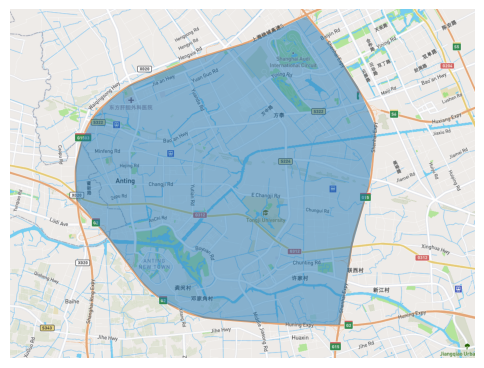

In [8]:
jiading_rec_bound = [121.1318, 31.2484, 121.2553, 31.3535]

fig = plt.figure(1, (6, 6), dpi=100)
ax = plt.subplot(111)
plt.sca(ax)
tbd.plot_map(plt, bounds=jiading_rec_bound, zoom=13, style=2)

jiading_polygon.plot(ax=ax, alpha=0.5)
plt.axis('off');

## `transbigdata.area_to_grid`(location, accuracy=500, method='rect', params='auto')

In [28]:
# generate the default grid
grid_rec, params_rec = tbd.area_to_grid(jiading_polygon)
pprint.pprint(params_rec)
grid_rec.head()

(121.13797109957756, 31.25168182840957, 121.25160248776572, 31.351423696458035)
{'deltalat': 0.004496605206422906,
 'deltalon': 0.005262604989003139,
 'gridsize': 500,
 'method': 'rect',
 'slat': 31.25168182840957,
 'slon': 121.13797109957756,
 'theta': 0}


,LONCOL,LATCOL,geometry
171,9,0,"POLYGON ((121.18270 31.24943, 121.18797 31.249..."
174,10,0,"POLYGON ((121.18797 31.24943, 121.19323 31.249..."
177,11,0,"POLYGON ((121.19323 31.24943, 121.19849 31.249..."
180,12,0,"POLYGON ((121.19849 31.24943, 121.20375 31.249..."
183,13,0,"POLYGON ((121.20375 31.24943, 121.20902 31.249..."


In [33]:
# generate triangle grid
grid_tri, params_tri = tbd.area_to_grid(jiading_polygon, method='tri')  # to do: bug need to be fixed here
pprint.pprint(params_tri)
grid_tri.head()

(121.13797109957756, 31.25168182840957, 121.25160248776572, 31.351423696458035)


KeyError: 'loncol_1'

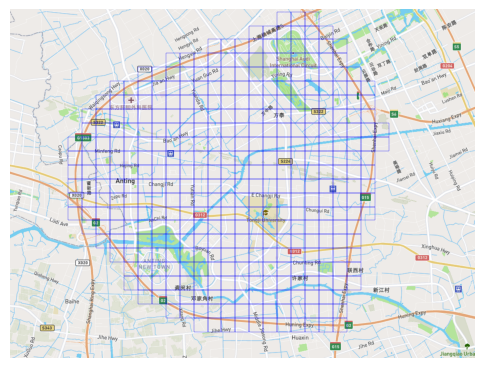

In [29]:
# Visualization
fig = plt.figure(1, (6, 6), dpi=100)
ax = plt.subplot(111)
plt.sca(ax)
tbd.plot_map(plt, bounds=jiading_rec_bound, zoom=13, style=2)
grid.plot(ax=ax, lw=0.2, edgecolor='blue', facecolor="None")

plt.axis('off');

## `transbigdata.area_to_params`(location, accuracy=500, method='rect')

Sometime, due to data sparisity, we do not need to generate all the grids. In such case, we can use `transbigdata.area_to_params`.  

This method only creat a dictionary file for the grid, thus is much faster.

In [27]:
params = tbd.area_to_params(jiading_polygon)
pprint.pprint(params)

{'deltalat': 0.004496605206422906,
 'deltalon': 0.005262604989003139,
 'gridsize': 500,
 'method': 'rect',
 'slat': 31.25168182840957,
 'slon': 121.13797109957756,
 'theta': 0}


## `transbigdata.GPS_to_grid`(lon, lat, params)

The next common step is to know which grid does each trajectory point belong to.

In [65]:
# First, we generate some random GPS points (20 points in this case)

lon_list, lat_list = [], []
for i in range(20): 
    gps_lon = random.uniform(jiading_rec_bound[0], jiading_rec_bound[2]) 
    gps_lat = random.uniform(jiading_rec_bound[1], jiading_rec_bound[3]) 
    lon_list.append(gps_lon) 
    lat_list.append(gps_lat) 
    
gps_random = pd.DataFrame({'veh_id': range(20),
                           'lon': lon_list,
                           'lat': lat_list,
                          })

gps_random.head()

,veh_id,lon,lat
0,0,121.233331,31.307202
1,1,121.248192,31.349099
2,2,121.220074,31.335226
3,3,121.255139,31.338965
4,4,121.159161,31.344227


In [66]:
# match each point to the rect grid
gps_random['LonCol'], gps_random['LatCol'] = tbd.GPS_to_grid(gps_random['lon'], gps_random['lat'], params_rec)

gps_random.head()

,veh_id,lon,lat,LonCol,LatCol
0,0,121.233331,31.307202,18,12
1,1,121.248192,31.349099,21,22
2,2,121.220074,31.335226,16,19
3,3,121.255139,31.338965,22,19
4,4,121.159161,31.344227,4,21


## `transbigdata.grid_to_centre`(gridid, params)

The center location of each grid can acquired using `transbigdata.grid_to_centre`

In [67]:
# Use the matched grid as example
gps_random['LonGridCenter'], gps_random['LatGridCenter'] = \
tbd.grid_to_centre([gps_random['LonCol'], gps_random['LatCol']], params_rec)

# check the matched results
gps_random.head()

,veh_id,lon,lat,LonCol,LatCol,LonGridCenter,LatGridCenter
0,0,121.233331,31.307202,18,12,121.232698,31.305641
1,1,121.248192,31.349099,21,22,121.248486,31.350607
2,2,121.220074,31.335226,16,19,121.222173,31.337117
3,3,121.255139,31.338965,22,19,121.253748,31.337117
4,4,121.159161,31.344227,4,21,121.159022,31.346111


## `transbigdata.grid_to_polygon`(gridid, params)

For visualization convenience, grid parameters can be transformed into `geometry` format

In [68]:
# Use the matched grid as example again
gps_random['grid_geo_polygon'] = tbd.grid_to_polygon([gps_random['LonCol'], gps_random['LatCol']], params_rec)

# check the matched results
gps_random.head()

,veh_id,lon,lat,LonCol,LatCol,LonGridCenter,LatGridCenter,grid_geo_polygon
0,0,121.233331,31.307202,18,12,121.232698,31.305641,POLYGON ((121.23006668688511 31.30339278828343...
1,1,121.248192,31.349099,21,22,121.248486,31.350607,POLYGON ((121.24585450185212 31.34835884034766...
2,2,121.220074,31.335226,16,19,121.222173,31.337117,POLYGON ((121.21954147690711 31.33486902472839...
3,3,121.255139,31.338965,22,19,121.253748,31.337117,POLYGON ((121.25111710684112 31.33486902472839...
4,4,121.159161,31.344227,4,21,121.159022,31.346111,POLYGON ((121.15639021703906 31.34386223514123...


## `transbigdata.grid_to_area`(data, shape, params, col=['LONCOL', 'LATCOL'])

In addition to grid, there might be several districts. `transbigdata.grid_to_area` can be used to match the information.  

In this case, there are only one district in `jiading_polygon`, the matched column is `id`.

In [69]:
gps_matched = tbd.grid_to_area(gps_random, jiading_polygon, params_rec, col=['LonCol', 'LatCol'])

# check the matched results
gps_matched.head()

/Applications/anaconda3/envs/tbd/lib/python3.9/site-packages/transbigdata/grids.py:414: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  data1 = gpd.sjoin(data1, shape)


,veh_id,lon,lat,LonCol,LatCol,LonGridCenter,LatGridCenter,grid_geo_polygon,geometry,index_right,id
0,0,121.233331,31.307202,18,12,121.232698,31.305641,POLYGON ((121.23006668688511 31.30339278828343...,POINT (121.23270 31.30564),0,1
1,2,121.220074,31.335226,16,19,121.222173,31.337117,POLYGON ((121.21954147690711 31.33486902472839...,POINT (121.22217 31.33712),0,1
2,6,121.212877,31.328945,14,17,121.211648,31.328124,"POLYGON ((121.2090162669291 31.32587581431555,...",POINT (121.21165 31.32812),0,1
3,8,121.145443,31.290806,1,9,121.143234,31.292151,POLYGON ((121.14060240207206 31.28990297266416...,POINT (121.14323 31.29215),0,1
4,11,121.183772,31.335577,9,19,121.185335,31.337117,POLYGON ((121.18270324198409 31.33486902472839...,POINT (121.18533 31.33712),0,1


## `transbigdata.grid_to_params`(grid)

A useful tool to get grid params from grid geometry

In [77]:
# this is the formal grid geometry 
grid_rec.head()

,LONCOL,LATCOL,geometry
171,9,0,"POLYGON ((121.18270 31.24943, 121.18797 31.249..."
174,10,0,"POLYGON ((121.18797 31.24943, 121.19323 31.249..."
177,11,0,"POLYGON ((121.19323 31.24943, 121.19849 31.249..."
180,12,0,"POLYGON ((121.19849 31.24943, 121.20375 31.249..."
183,13,0,"POLYGON ((121.20375 31.24943, 121.20902 31.249..."


In [78]:
tbd.grid_to_params(grid_rec)

{'slon': 121.13797109957761,
 'slat': 31.25168182840957,
 'deltalon': 0.005262604988999442,
 'deltalat': 0.0044966052064197015,
 'theta': 0,
 'method': 'rect'}

## `transbigdata.grid_params_optimize`(data, initialparams, col=['uid', 'lon', 'lat'], optmethod='centerdist', printlog=False, sample=0)

Offers several methods to optimize the grids

This method relies on the `scikit-opt` package. To do so, please run following code in cmd: 

```
pip install scikit-opt
```

For more details of this method, please refer to this [notebook](https://github.com/ni1o1/transbigdata/blob/main/example/Example%206-Optimize%20grid%20params.ipynb).

In [82]:
# we use the random generated data again
gps_random.head()

,veh_id,lon,lat,LonCol,LatCol,LonGridCenter,LatGridCenter,grid_geo_polygon
0,0,121.233331,31.307202,18,12,121.232698,31.305641,POLYGON ((121.23006668688511 31.30339278828343...
1,1,121.248192,31.349099,21,22,121.248486,31.350607,POLYGON ((121.24585450185212 31.34835884034766...
2,2,121.220074,31.335226,16,19,121.222173,31.337117,POLYGON ((121.21954147690711 31.33486902472839...
3,3,121.255139,31.338965,22,19,121.253748,31.337117,POLYGON ((121.25111710684112 31.33486902472839...
4,4,121.159161,31.344227,4,21,121.159022,31.346111,POLYGON ((121.15639021703906 31.34386223514123...


In [81]:
tbd.grid_params_optimize(gps_random, params_rec, col=['veh_id', 'lon', 'lat'])

{'slon': 121.14075391657369,
 'slat': 31.255933573802697,
 'deltalon': 0.005262604989003139,
 'deltalat': 0.004496605206422906,
 'theta': 50.18307147409493,
 'method': 'rect'}